In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

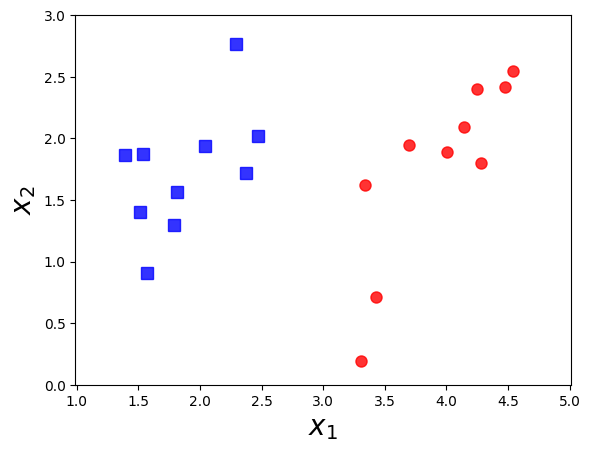

In [2]:
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones((N)), -1*np.ones((N))), axis = 0)
# plot points
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# pdf.savefig()
plt.show()

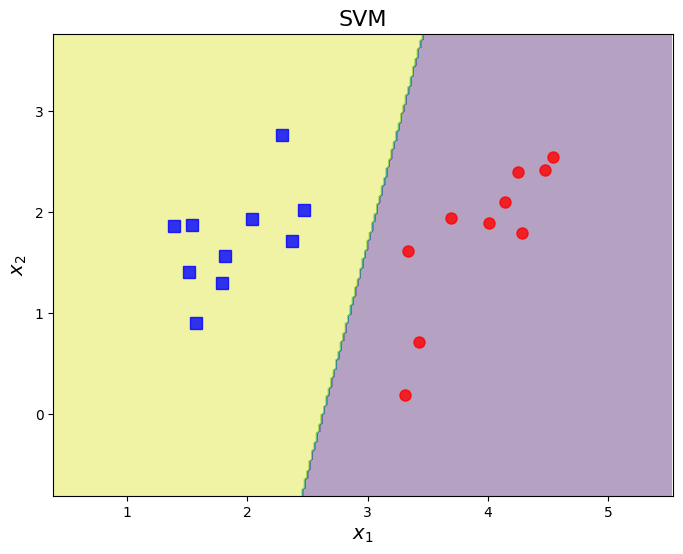

In [4]:
clf = svm.SVC(kernel='linear') 
clf.fit(X, y)
plt.figure(figsize=(8,6))
    
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize=8, alpha=0.8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize=8, alpha=0.8)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('SVM', fontsize=16)
plt.show()